In [15]:
import pandas as pd

from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [16]:
sns.set_style("whitegrid")

In [17]:
def load_text_dataset_pandas(dataset_path):
    df = pd.read_csv(dataset_path)

    X = df.iloc[:, 0].to_numpy()
    y = df.iloc[:, 1].to_numpy()

    return X, y

In [18]:
def vectorize_text(X_train, X_test):
    tfidf_vectorizer = TfidfVectorizer()
    V_train = tfidf_vectorizer.fit_transform(X_train)
    V_test = tfidf_vectorizer.transform(X_test)

    return V_train, V_test

#### test dataset

In [55]:
X, y = load_text_dataset_pandas("test_dataset.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=20) 

V_train, V_test = vectorize_text(X_train, X_test)

In [56]:
clf = MultinomialNB()
clf.fit(V_train, y_train)

MultinomialNB()

In [57]:
y_pred = clf.predict(V_test.toarray())

In [58]:
y_test

array(['no spam', 'no spam', 'no spam', 'spam'], dtype=object)

In [59]:
y_pred

array(['spam', 'spam', 'spam', 'spam'], dtype='<U7')

In [60]:
print(accuracy_score(y_test, y_pred))

0.25


#### 20newsgroups dataset - multiclass classification

In [32]:
X, y = load_text_dataset_pandas("20newsgroups.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=20) 

In [33]:
V_train, V_test = vectorize_text(X_train, X_test)

In [34]:
clf = MultinomialNB()
clf.fit(V_train, y_train)

MultinomialNB()

In [35]:
y_pred = clf.predict(V_test)

Text(0.5, 1.0, 'Confusion matrix - 20newsgroups dataset')

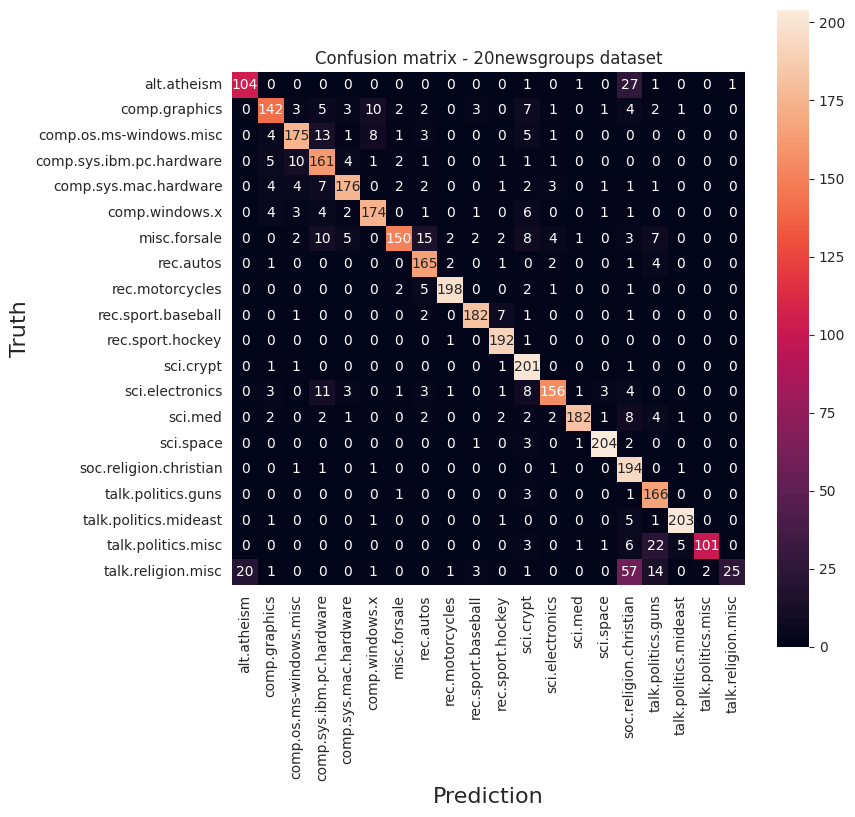

In [36]:
mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8.27, 8.27))
sns.heatmap(mat, ax=ax, square = True, annot=True, fmt = "d", xticklabels=clf.classes_, yticklabels=clf.classes_)
ax.set_xlabel("Prediction", fontsize=16)
ax.set_ylabel("Truth", fontsize=16)
ax.set_title("Confusion matrix - 20newsgroups dataset")

In [37]:
print(f"Accuracy: {accuracy_score(y_pred, y_test):.3f}")

Accuracy: 0.862


#### Spam - No spam

In [38]:
X, y = load_text_dataset_pandas("spam_or_not_spam.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=20) 

In [39]:
V_train, V_test = vectorize_text(X_train, X_test)

In [40]:
clf = MultinomialNB()
clf.fit(V_train, y_train)

MultinomialNB()

Text(0.5, 1.0, 'Confusion matrix - Spam/Not spam dataset')

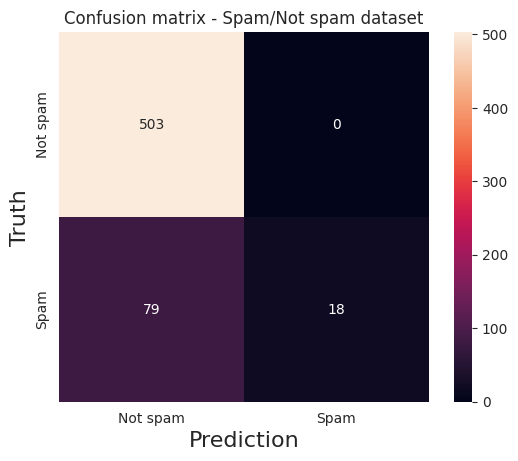

In [41]:
y_pred = clf.predict(V_test)

mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()
sns.heatmap(mat, square = True, annot=True, fmt = "d", xticklabels=clf.classes_, yticklabels=clf.classes_)
ax.set_xlabel("Prediction", fontsize=16)
ax.set_ylabel("Truth", fontsize=16)
ax.set_title("Confusion matrix - Spam/Not spam dataset")

In [43]:
print(f"Accuracy:\t\t{accuracy_score(y_test, y_pred):.3f}")
print("--- Not spam ---")
print(f"Precision:\t\t{precision_score(y_test, y_pred, pos_label='Not spam'):.3f}")
print(f"Recall:\t\t\t{recall_score(y_test, y_pred, pos_label='Not spam'):.3f}")
print(f"F1:\t\t\t{f1_score(y_test, y_pred, pos_label='Not spam'):.3f}")
print("--- Spam ---")
print(f"Precision:\t\t{precision_score(y_test, y_pred, pos_label='Spam'):.3f}")
print(f"Recall:\t\t\t{recall_score(y_test, y_pred, pos_label='Spam'):.3f}")
print(f"F1:\t\t\t{f1_score(y_test, y_pred, pos_label='Spam'):.3f}")

Accuracy:		0.868
--- Not spam ---
Precision:		0.864
Recall:			1.000
F1:			0.927
--- Spam ---
Precision:		1.000
Recall:			0.186
F1:			0.313
